In [15]:
import os
import cv2
import numpy as np


images = []
labels = []

path = r'C:\Users\Administrator\Downloads\project\new\data\training_data'

dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    images.append(img)
    labels.append(i)


In [16]:
X = np.array(images)
len(X)

20628

In [17]:
X.shape

(20628, 64, 64, 3)

In [18]:
y = np.array(labels)
len(y)

20628

In [19]:
y.shape

(20628,)

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [30]:
from sklearn.utils import shuffle
X_sh, y_sh = shuffle(X, y, random_state=42)

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=36, activation='softmax'))

In [51]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
history = model.fit(datagen.flow(X_sh, y_sh, batch_size=32),
                    steps_per_epoch=len(X_sh) / 32, epochs=20,
                    validation_data=(X_sh, y_sh))

Epoch 1/20
644/644 [==============================] - 19s 28ms/step - loss: 0.7336 - accuracy: 0.7930 - val_loss: 0.1105 - val_accuracy: 0.9661
Epoch 2/20
644/644 [==============================] - 18s 28ms/step - loss: 0.3404 - accuracy: 0.8960 - val_loss: 0.0990 - val_accuracy: 0.9684
Epoch 3/20
644/644 [==============================] - 18s 28ms/step - loss: 0.2762 - accuracy: 0.9134 - val_loss: 0.0917 - val_accuracy: 0.9697
Epoch 4/20
644/644 [==============================] - 18s 28ms/step - loss: 0.2469 - accuracy: 0.9230 - val_loss: 0.1002 - val_accuracy: 0.9675
Epoch 5/20
644/644 [==============================] - 18s 28ms/step - loss: 0.2298 - accuracy: 0.9269 - val_loss: 0.0983 - val_accuracy: 0.9660
Epoch 6/20
644/644 [==============================] - 18s 28ms/step - loss: 0.2057 - accuracy: 0.9337 - val_loss: 0.0994 - val_accuracy: 0.9672
Epoch 7/20
644/644 [==============================] - 18s 28ms/step - loss: 0.2044 - accuracy: 0.9342 - val_loss: 0.0894 - val_accuracy:

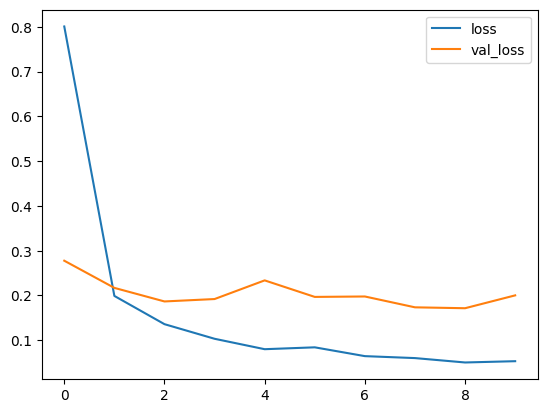

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [55]:
images = []
labels = []

path = r'C:\Users\Administrator\Downloads\project\new\data\testing_data'

dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    test_images.append(img)
    test_labels.append(i)


X_test = np.array(test_images)
y_test = np.array(test_labels)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test = le.fit_transform(y_test)

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


63/63 [==============================] - 7s 118ms/step - loss: 0.0629 - accuracy: 0.9732
Test Loss: 0.06294932961463928, Test Accuracy: 0.9732142686843872


1/1 [==============================] - 0s 33ms/step


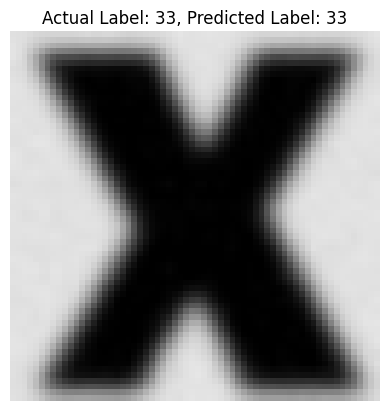

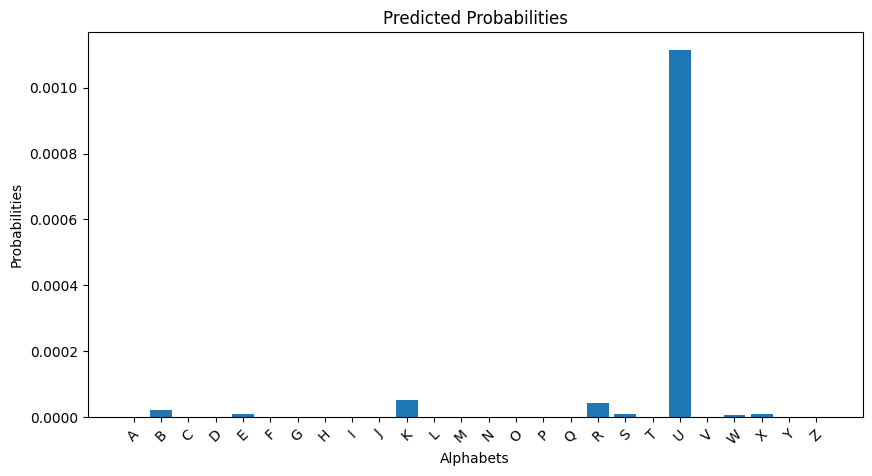

In [72]:
import matplotlib.pyplot as plt
import string

# Assuming you have already loaded the test images and labels

# Select one random image from the test set
index = np.random.randint(len(X_test))
sample_image = X_test[index]
actual_label = y_test[index]

# Reshape the image to fit the model input shape if necessary
# sample_image = sample_image.reshape(1, 64, 64, 3)  # Modify this if the shape is different

# Predict the probabilities for each class for the selected image
probabilities = model.predict(sample_image.reshape(1, 64, 64, 3))

# Display the image
plt.imshow(sample_image)
plt.axis('off')
plt.title(f"Actual Label: {actual_label}, Predicted Label: {np.argmax(probabilities)}")
plt.show()

# Display the predicted probabilities for each class
num_classes = 26  # Update this with the number of classes your model predicts
alphabet = string.ascii_uppercase[:num_classes]  # Limit the alphabet to the number of classes
predicted_alphabet = {i: letter for i, letter in enumerate(alphabet)}
predicted_labels = [predicted_alphabet[i] for i in range(num_classes)]

plt.figure(figsize=(10, 5))
plt.bar(predicted_labels, probabilities[0][:num_classes])
plt.xlabel('Alphabets')
plt.ylabel('Probabilities')
plt.title('Predicted Probabilities')
plt.xticks(rotation=45)
plt.show()


In [63]:
model.save('trained_model.keras')